In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('diabetes_data.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
p = df[df['diabetes'] == 1]

D:\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


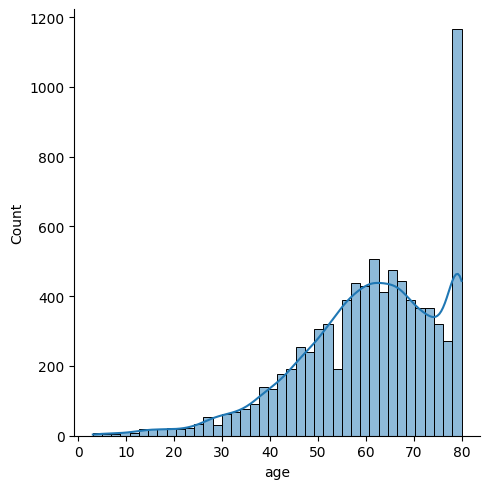

In [4]:
import seaborn as sns
sns.displot(data = p, x = 'age', kde = True)

In [5]:
df.shape

(100000, 9)

In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [8]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [9]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [10]:
import seaborn as sns

C:\Users\subhr\AppData\Local\Temp\ipykernel_14348\3773980407.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


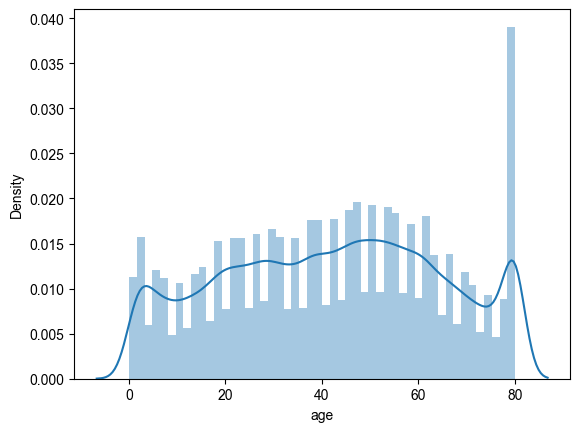

In [11]:
sns.distplot(df['age'])
sns.set(rc={'figure.figsize':(20,15)})

In [12]:
df.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


In [13]:
# from sklearn.preprocessing import labelEncoder
from sklearn.preprocessing import LabelEncoder

In [14]:
labelencoder=LabelEncoder()

In [15]:
df['gender']=labelencoder.fit_transform(df['gender'])
df['smoking_history']=labelencoder.fit_transform(df['smoking_history'])

In [16]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0


In [17]:
df.gender.value_counts()

gender
0    58552
1    41430
2       18
Name: count, dtype: int64

In [18]:
df['smoking_history'].value_counts()

smoking_history
0    35816
4    35095
3     9352
1     9286
5     6447
2     4004
Name: count, dtype: int64

No Info      0
never or ever       4/2
former or not current          3/5
current        1

0->female
1->male


In [19]:
x=df.drop(['diabetes'],axis=1)
y=df['diabetes']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [22]:
logmodel.fit(x_train,y_train)

D:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
answer = logmodel.score(x,y)*100
answer

95.19999999999999

In [24]:
from sklearn.metrics import accuracy_score
y_pred=logmodel.predict(x_test)
score=accuracy_score(y_test,y_pred)*100
score

95.345

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),x,y,cv=5)

array([0.9606 , 0.9606 , 0.96015, 0.95965, 0.9596 ])

In [26]:
# from sklearn.svm import SVC
# cross_val_score(SVC(gamma='auto'),x,y,cv=5)

In [27]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(n_estimators=40),x,y,cv=5)

array([0.96985, 0.9706 , 0.9679 , 0.9698 , 0.9702 ])

In [28]:
import pickle

pickle.dump(logmodel,open('model.pkl','wb'))